<a href="https://colab.research.google.com/github/Jojo18-20/AI_course_submission/blob/main/Exercice2_Johanna_Schaefer_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercice 2 Johanna Schaefer

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.linear_model import LinearRegression

Part 1

In [52]:
url_p1 = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df_p1 = pd.read_csv(url_p1)
df_p1 = df_p1.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

In [55]:
x_p1 = df_p1.drop(['Arrival_delay'], axis=1)
y_p1 = df_p1['Arrival_delay']
X_train_p1, X_test_p1, y_train_p1, y_test_p1 = train_test_split(x_p1, y_p1, test_size=0.2, random_state=42)

Normal Linear Regression

In [56]:
model_p1 = LinearRegression()

# Fit the model to the training data
model_p1.fit(X_train_p1, y_train_p1)

# Predict the test data with the fitted model
y_pred_p1_linreg = model_p1.predict(X_test_p1)

In [57]:
mae_p1_linreg = mean_absolute_error(y_test_p1, y_pred_p1_linreg)
mse_p1_linreg = mean_squared_error(y_test_p1, y_pred_p1_linreg)
r2_p1_linreg = r2_score(y_test_p1, y_pred_p1_linreg)

print(f"Mean Absolute Error: {mae_p1_linreg}")
print(f"Mean Squared Error: {mse_p1_linreg}")
print(f"R-squared: {r2_p1_linreg}")

Mean Absolute Error: 9.654193995146553
Mean Squared Error: 176.3735387676195
R-squared: 0.9940853862137997


XGR Regressor

In [59]:
param_grid_p1={
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 4, 6],
    "learning_rate": [0.01, 0.1, 0.3],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Create the GridSearchCV object
grid_search_p1 = GridSearchCV(
    estimator=xgb.XGBRegressor(objective="reg:squarederror",
    random_state=42),
    param_grid=param_grid_p1,
    cv=5,
    verbose=2,
    n_jobs=-3
)

# Fit the grid search to the scaled training data
grid_search_p1.fit(X_train_p1, y_train_p1)

# Get the best parameters
best_params_p1 = grid_search_p1.best_params_

print("Best Parameters:", best_params_p1)
print("Best Score:", grid_search_p1.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsampl

In [61]:
best_p1 = xgb.XGBRegressor(n_estimators=best_params_p1['n_estimators'],
                        learning_rate=best_params_p1['learning_rate'],
                        max_depth=best_params_p1['max_depth'],
                        subsample=best_params_p1['subsample'],
                        colsample_bytree=best_params_p1['colsample_bytree'],
                        objective="reg:squarederror",
                        random_state=42
                        )
best_p1.fit(X_train_p1, y_train_p1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [63]:
y_pred_p1_xgb = best_p1.predict(X_test_p1)
mae_p1_xgb = mean_absolute_error(y_test_p1, y_pred_p1_xgb)
mse_p1_xgb = mean_squared_error(y_test_p1, y_pred_p1_xgb)
r2_p1_xgb = r2_score(y_test_p1, y_pred_p1_xgb)
print(f"Mean Absolute Error: {mae_p1_xgb}")
print(f"Mean Squared Error: {mse_p1_xgb}")
print(f"R-squared: {r2_p1_xgb}")

Mean Absolute Error: 10.712075233459473
Mean Squared Error: 216.34536743164062
R-squared: 0.9927449226379395


In [64]:
results_p1 = pd.DataFrame({
    "Model": ["Linear Regression", "XGBoost Regression"],
    "R2": [
        r2_score(y_test_p1, y_pred_p1_linreg),
        r2_score(y_test_p1, y_pred_p1_xgb)
    ],
    "MAE": [
        mean_absolute_error(y_test_p1, y_pred_p1_linreg),
        mean_absolute_error(y_test_p1, y_pred_p1_xgb)
    ],
    "MSE": [
        mean_squared_error(y_test_p1, y_pred_p1_linreg),
        mean_squared_error(y_test_p1, y_pred_p1_xgb)
    ]
})
print(results_p1)

                Model        R2        MAE         MSE
0   Linear Regression  0.994085   9.654194  176.373539
1  XGBoost Regression  0.992745  10.712075  216.345367


Part 2

In [34]:
#Load Data
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BikeSharing.csv'
df = pd.read_csv(url)

In [35]:
target = 'cnt'
features = [
    'temp','atemp','hum','windspeed','weathersit',
    'hr','weekday','workingday','holiday','season','yr'
]

X = df[features].copy()
y = df[target].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [36]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Normal Linear Regression

In [37]:
# Create a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linreg = model.predict(X_test)

In [46]:
mae_linreg = mean_absolute_error(y_test, y_pred_linreg)
mse_linreg = mean_squared_error(y_test, y_pred_linreg)
r2_linreg = r2_score(y_test, y_pred_linreg)
print(f"Mean Absolute Error: {mae_linreg}")
print(f"Mean Squared Error: {mse_linreg}")
print(f"R-squared: {r2_linreg}")

Mean Absolute Error: 104.79577059911452
Mean Squared Error: 19379.312944744703
R-squared: 0.3879974354720257


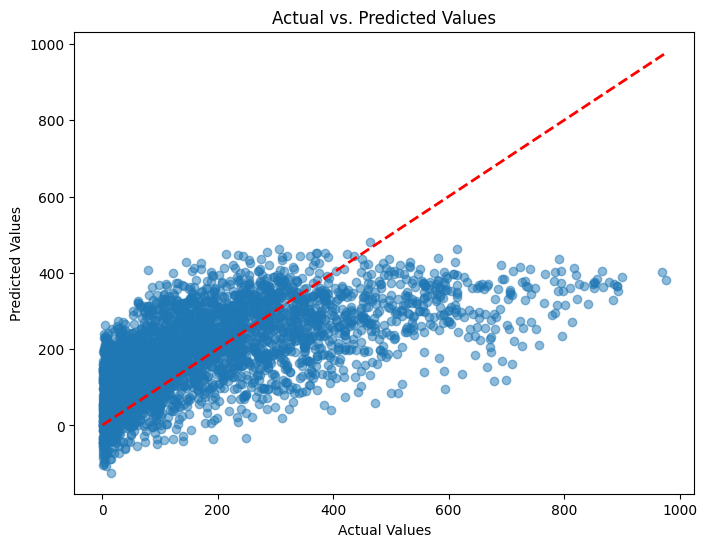

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linreg, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)
plt.show()

XGR Regressor

In [58]:
param_grid={
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 4, 6],
    "learning_rate": [0.01, 0.1, 0.3],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(objective="reg:squarederror",
    random_state=42),
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-3
)
grid_search_scaled = GridSearchCV(
    estimator=xgb.XGBRegressor(objective="reg:squarederror",
    random_state=42),
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-3
)

# Fit the grid search to the scaled training data
grid_search_scaled.fit(X_train_scaled, y_train)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_params_scaled=grid_search.best_params_

print("Best Parameters(without scale):", best_params)
print("Best Score (without scale):", grid_search.best_score_)
print("Best Parameters(scaled):", best_params_scaled)
print("Best Score(scaled):", grid_search_scaled.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsampl

In [ ]:
#conclusion: scaling not necessary

In [42]:
best = xgb.XGBRegressor(n_estimators=best_params['n_estimators'],
                        learning_rate=best_params['learning_rate'],
                        max_depth=best_params['max_depth'],
                        subsample=best_params['subsample'],
                        colsample_bytree=best_params['colsample_bytree'],
                        objective="reg:squarederror",
                        random_state=42
                        )

In [43]:
# fit model
best.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [48]:
# make predictions
y_pred_xgb = best.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"Mean Absolute Error: {mae_xgb}")
print(f"Mean Squared Error: {mse_xgb}")
print(f"R-squared: {r2_xgb}")

Mean Absolute Error: 24.71476448225811
Mean Squared Error: 1625.0909405869534
R-squared: 0.9486793042629461


In [50]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "XGBoost Regression"],
    "R2": [
        r2_score(y_test, y_pred_linreg),
        r2_score(y_test, y_pred_xgb)
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_linreg),
        mean_absolute_error(y_test, y_pred_xgb)
    ],
    "MSE": [
        mean_squared_error(y_test, y_pred_linreg),
        mean_squared_error(y_test, y_pred_xgb)
    ]
})
print(results)

                Model        R2         MAE           MSE
0   Linear Regression  0.387997  104.795771  19379.312945
1  XGBoost Regression  0.948679   24.714764   1625.090941


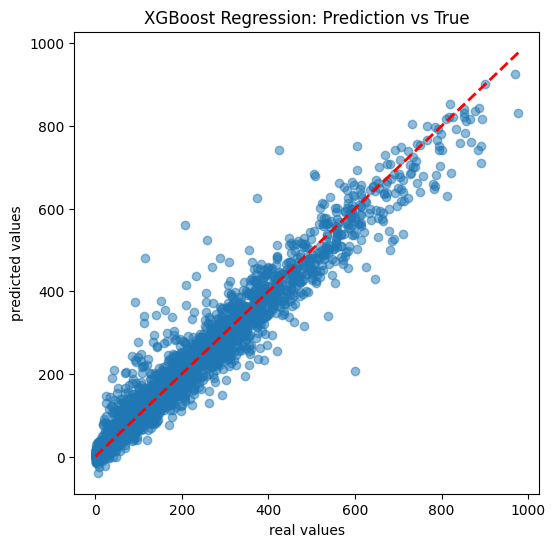

In [45]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--", linewidth=2)
plt.xlabel("real values")
plt.ylabel("predicted values")
plt.title("XGBoost Regression: Prediction vs True")
plt.show()